# PL03. Regresión Lineal Univariante por Derivadas

__Borja González Seoane. Aprendizaje Automático. Curso 2024-25__

Objetivos:

1. Implementar un modelo de regresión lineal univariante mediante el método de las derivadas, a partir de las ecuaciones obtenidas en la demostración.
2. Probar el modelo con un conjunto de datos de ejemplo.
3. Comparar los resultados con el regresor lineal de Scikit-Learn, a saber
`skearn.linear model.LinearRegression`.


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [46]:
NUMERO_DE_PUNTOS = 100

## Creamos 2 vectores aleatorios para pruebas

In [47]:
x = np.random.rand(NUMERO_DE_PUNTOS) * 10
y = np.random.rand(NUMERO_DE_PUNTOS) * 10
x.sort()
y.sort()

In [48]:
print(x)

[0.21869691 0.64077942 0.69379003 0.69382376 0.88686218 0.93473728
 0.94526638 1.07143975 1.14646229 1.19986473 1.20878187 1.20886718
 1.53669164 1.66846205 1.87274075 1.89336206 1.98832177 2.10076133
 2.3555647  2.42524739 2.53599901 2.54870757 2.65296911 2.67689255
 2.76986202 3.09873819 3.18703418 3.22918442 3.37839797 3.40968197
 3.42707715 3.47804829 3.53769229 3.5862151  3.72222401 3.72705015
 3.84549644 3.92414601 3.94168153 4.03341475 4.20145403 4.2398969
 4.49070487 4.59246999 4.70305683 4.75188112 4.77578128 4.8364987
 4.98797681 5.01817225 5.08930525 5.18917013 5.1924113  5.20280167
 5.21500256 5.34191599 5.39431126 5.40574359 5.61474181 5.68264761
 5.7965171  6.09360878 6.18663278 6.21205549 6.21686392 6.31048342
 6.32869249 6.44587335 6.69816377 6.83715726 6.97051106 6.97890245
 6.99602521 7.12358445 7.19631081 7.27367211 7.29774322 7.36468313
 7.50945275 7.76032734 7.78536517 7.79443195 7.86242485 7.89381961
 8.08589908 8.13436786 8.33271294 8.41964361 8.86035493 9.061310

In [49]:
print(y)

[0.04853912 0.11616758 0.20651478 0.43124428 0.55584137 0.61002916
 0.68391774 0.80363399 0.82753646 0.86632695 0.98778925 1.04204246
 1.06788812 1.10650643 1.19058651 1.3500611  1.37074489 1.54176157
 1.58186973 1.6665039  1.68670384 1.69950304 1.78328761 1.97824319
 2.14652775 2.38390674 2.5037076  2.50831436 2.53695678 2.59899817
 2.81099832 2.82022413 2.96961732 3.20119347 3.60868812 3.65250159
 3.93876902 3.99311057 4.07055397 4.12979073 4.13901313 4.1428068
 4.31485803 4.31557271 4.36282999 4.44441641 4.57246012 4.71971955
 4.74714502 4.99301606 5.002736   5.41001483 5.5631829  5.8513941
 5.92791776 6.07799948 6.07819761 6.1401412  6.26028936 6.26423147
 6.49336566 6.54729446 6.72108837 6.8522018  6.89587272 7.0179189
 7.05846572 7.17656706 7.2043014  7.29089341 7.47788192 7.48667202
 7.56029898 7.59027969 7.59192556 7.77439279 7.83956319 7.92787223
 8.06903645 8.06993454 8.12602431 8.19229813 8.34258698 8.71716388
 8.86020867 8.90793773 8.91629763 8.92975216 9.19957917 9.3036829

## Implementacion ecuaciones transaprencia 44

In [50]:
def hallar_beta_1(x,y):
    """
    Calcula beta_1, la pendiente de la recta de regresión lineal
    """
    numerador= np.sum((x*y)-y.mean()*x)
    denominador=np.sum((x**2)-x.mean()*x)
    return numerador/denominador

In [51]:
#Prueba de la función
hallar_beta_1(x,y)

np.float64(1.1418732045450783)

In [52]:
def hallar_beta_0(x: np.array,y: np.array, beta_1: float) -> float:
    """
    Calcula beta_0, la ordenada al origen de la recta de regresión lineal
    """
    return y.mean() - beta_1 * x.mean()

In [53]:
#Prueba de la función
hallar_beta_0(x,y,hallar_beta_1(x,y))

np.float64(-0.670409814433528)

## Graficos

In [54]:
# Halamos recta RLU
beta_1 = hallar_beta_1(x,y)
beta_0 = hallar_beta_0(x,y,beta_1)

recta_RLU = beta_0 + beta_1 * x
print(recta_RLU)

[-0.42068567  0.06127904  0.12181043  0.12184895  0.34227435  0.39694164
  0.40896453  0.55303852  0.63870475  0.69968357  0.70986581  0.70996323
  1.08429719  1.23476229  1.46802267  1.49156959  1.60000154  1.72839325
  2.0193464   2.09891519  2.2253795   2.23989107  2.35894453  2.38626206
  2.4924214   2.8679563   2.96877912  3.01690935  3.1872923   3.22301466
  3.24287776  3.30108033  3.36918622  3.42459312  3.57989804  3.58540888
  3.72065952  3.81046737  3.83049071  3.93523841  4.12711797  4.17101485
  4.45740575  4.57360861  4.69988476  4.7556359   4.78292686  4.85225845
  5.02522725  5.05970661  5.14093148  5.25496451  5.25866552  5.27053
  5.28446187  5.42938092  5.48920967  5.50226394  5.7409134   5.81845322
  5.94847774  6.28771877  6.39394038  6.42296989  6.42846051  6.53536211
  6.55615456  6.68996024  6.97804391  7.13675686  7.28902999  7.2986119
  7.31816391  7.46382039  7.54686467  7.63520146  7.66268763  7.73912451
  7.90443306  8.19090003  8.21949006  8.22984317  8.307

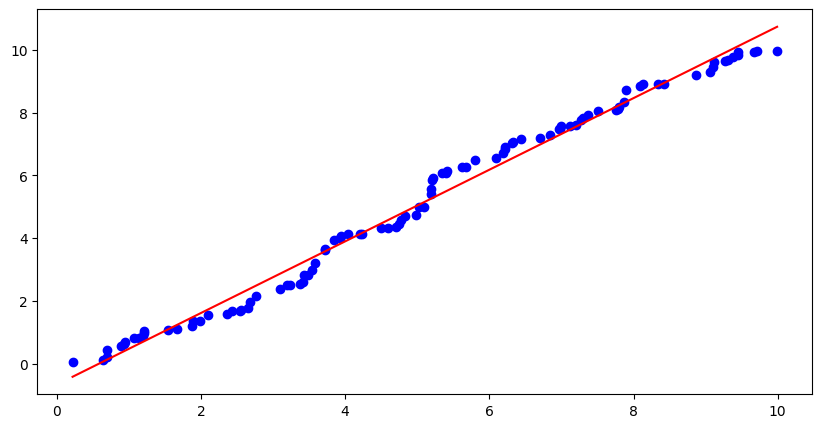

In [62]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue')
plt.plot(x, recta_RLU, color='red')

plt.show()

### Prueba regresor Sckitlearn

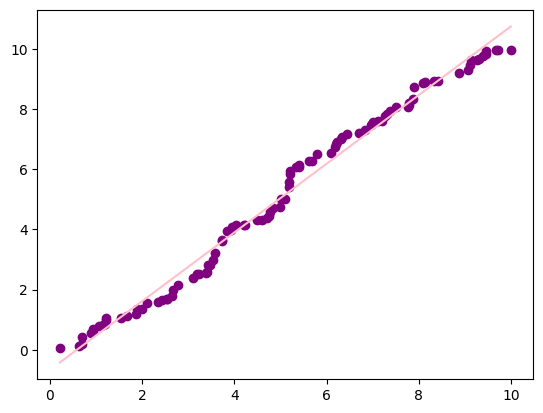

In [61]:
rlu_sckitlearn = LinearRegression()
rlu_sckitlearn.fit(x.reshape(-1,1), y)
y_pred = rlu_sckitlearn.predict(x.reshape(-1,1))
puntos = plt.scatter(x, y, color='purple')
recta = plt.plot(x, y_pred, color='pink')

plt.show()

### Comparacion de ambos regresores

#### Graficamente

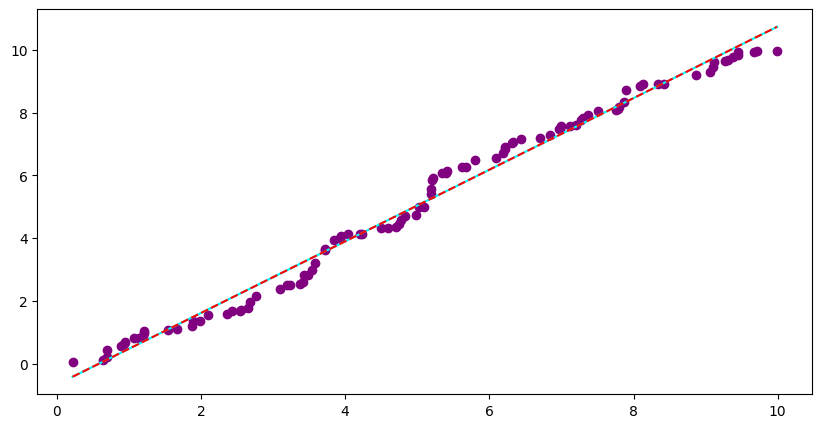

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(x, y, color='purple')
plt.plot(x, recta_RLU, color='cyan')
plt.plot(x, y_pred, color='red', linestyle='dashed')
plt.show()

#### Numericamente

In [65]:
print(beta_0)
print(beta_1)

-0.670409814433528
1.1418732045450783


In [67]:
print(rlu_sckitlearn.intercept_)
print(rlu_sckitlearn.coef_)

-0.6704098144335289
[1.1418732]


Se aprecia un error nimio o nulo por lo que con ambas regresiones obtenemos el mismo resultado

## Creamos el metodo RegresionLinearDerivadas

In [79]:
class RegresorLinearDerivadas:
    def __init__(self):
        self._beta_0 = None
        self._beta_1 = None
    
    def __calcular_beta_1(self, x: np.array, y: np.array) -> float:
        """
        Calcula beta_1, la pendiente de la recta de regresión lineal
        """
        numerador = np.sum((x*y) - y.mean()*x)
        denominador = np.sum((x**2) - x.mean()*x)
        return numerador / denominador
    
    def __calcular_beta_0(self, x: np.array, y: np.array, beta_1: float) -> float:
        """
        Calcula beta_0, la ordenada al origen de la recta de regresión lineal
        """
        return y.mean() - beta_1 * x.mean()
    
    def fit(self, x: np.array, y: np.array) -> None:
        """ 
        Ajusta el modelo de regresión lineal a los datos de entrada (metodo de entrenamiento)
        """
        self._beta_1 = self.__calcular_beta_1(x, y)
        self._beta_0 = self.__calcular_beta_0(x, y, self._beta_1)

    def predict(self, x: np.array) -> np.array:
        """
        Predice los valores de y a partir de los valores de x
        """
        return self._beta_0 + self._beta_1 * x
    

#### Prueba de la clase

In [80]:
modelo_derivadas = RegresorLinearDerivadas()
modelo_derivadas.fit(x, y)

In [81]:
print(modelo_derivadas._beta_0)
print(modelo_derivadas._beta_1)

-0.670409814433528
1.1418732045450783


In [82]:
y_hat_derivadas = modelo_derivadas.predict(x)

print(y_hat_derivadas)

[-0.42068567  0.06127904  0.12181043  0.12184895  0.34227435  0.39694164
  0.40896453  0.55303852  0.63870475  0.69968357  0.70986581  0.70996323
  1.08429719  1.23476229  1.46802267  1.49156959  1.60000154  1.72839325
  2.0193464   2.09891519  2.2253795   2.23989107  2.35894453  2.38626206
  2.4924214   2.8679563   2.96877912  3.01690935  3.1872923   3.22301466
  3.24287776  3.30108033  3.36918622  3.42459312  3.57989804  3.58540888
  3.72065952  3.81046737  3.83049071  3.93523841  4.12711797  4.17101485
  4.45740575  4.57360861  4.69988476  4.7556359   4.78292686  4.85225845
  5.02522725  5.05970661  5.14093148  5.25496451  5.25866552  5.27053
  5.28446187  5.42938092  5.48920967  5.50226394  5.7409134   5.81845322
  5.94847774  6.28771877  6.39394038  6.42296989  6.42846051  6.53536211
  6.55615456  6.68996024  6.97804391  7.13675686  7.28902999  7.2986119
  7.31816391  7.46382039  7.54686467  7.63520146  7.66268763  7.73912451
  7.90443306  8.19090003  8.21949006  8.22984317  8.307

## [Extra] Comprobacion de metodos privams de la clase

In [83]:
## Comprobamos el uso de metodos privados de la clase RegresorLinearDerivadas
## modelo_derivadas.__calcular_beta_0(x, y, modelo_derivadas._beta_1)
## modelo_derivadas.__calcular_beta_1(x, y)

## Estos metodos dan error, como hemos definido que son privados, no se pueden acceder desde fuera de la clase
## Para acceder a ellos hemos de hacerlo desde dentro de la clase o llamando a la clase:

modelo_derivadas._RegresorLinearDerivadas__calcular_beta_1(x, y)
modelo_derivadas._RegresorLinearDerivadas__calcular_beta_0(x, y, modelo_derivadas._beta_1)

print(modelo_derivadas._RegresorLinearDerivadas__calcular_beta_1(x, y))
print(modelo_derivadas._RegresorLinearDerivadas__calcular_beta_0(x, y, modelo_derivadas._beta_1))

1.1418732045450783
-0.670409814433528
